<a href="https://colab.research.google.com/github/kphopthorn/Multi-Label/blob/main/FULL_Bi_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pythainlp tensorflow_addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 105.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 54.1 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import re
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import pickle as p
import plotly
import plotly.graph_objs as go
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from pythainlp.tokenize import word_tokenize

In [ ]:
EPOCHS = 5
BS = 64

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/IS_multi-label/train_data.csv')

In [ ]:
test_data = pd.read_csv('/content/drive/MyDrive/IS_multi-label/test_data.csv')

In [ ]:
import pickle
with open('/content/drive/MyDrive/IS_multi-label/tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [ ]:
def encoding_doc(token, words):
    return(token.texts_to_sequences(words))

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
max_len = 100
embedding_dim = 300

In [ ]:
X_train = train_data.comm_norm.values.tolist()
X_train[:5]

['สะพาน ไทย ญี่ปุ่น มุ่งหน้า บ่อน ไก่ สะพาน เหลือง ทางลง สวนลุม หลุม ลึก หลุม',
 '‘ ข้อมูล บรรยาย ประกอบการ ปักหมุด ปัญหา แจ้ง แมว จรจัด อาศัย คอนโด บ้าน ซอย อ่อนนุช ถนน อ่อนนุช สวนหลวง แขวง สวนหลวง',
 'ปัญหา งานก่อสร้าง อาคาร ที่จอดรถ คนงาน เชื่อมเหล็ก สะเก็ด ไฟ ล่วง หล่น ลงมา รถ ประชาชน การป้องกัน ตรวจสอบ ปัญหา เกิดเหตุ ข้าม สะพาน มีนบุรี เมตร ซอย ทีน ซอย แยก ราษฎร์ พัฒนา แยก มิสทีน ถนน รามคำแหง สะพาน ประชาชน แจ้ง ข้าม สะพาน มีนบุรี เมตร ซอย มิสทีน สะพาน ก่อสร้าง อาคาร ที่จอดรถ คนงาน เชื่อมเหล็ก สะเก็ด ไฟ ล่วง หล่น ลงมา รถ ประชาชน การป้องกัน สะเก็ด ลูกไฟ ล่วง ถนน',
 'ต้นไม้ ยื่น ออกจาก บ้าน ถนน เจ้าของ ต้นไม้ กีดขวาง การจราจร ถนน รูด รถ รอย',
 'สะพานลอย ป้ายรถเมล์ ห้าง เพชรเกษม ปาก ทางเข้า สาย มืด']

In [ ]:
X_test = test_data.comm_norm.values.tolist()
X_test[:5]

['ดำเนินการ ซ่อม ไฟ ส่องสว่าง ดับ ชำรุด บริเวณ ทางเดิน ริม คลอง โพ ถนน ประชาราษฎร์ สาย ฝั่ง ธนาคาร กสิกร สาขา โพ ไฟฟ้า ส่องสว่าง ดับ ชำรุด เป็นเวลา ทางเดิน ริม คลอง ริม เขื่อน แม่น้ำ เจ้าพระยา ตอนกลางคืน มืด อันตราย ขอความกรุณา เร่ง ดำเนินการ บรรเทา ความเดือดร้อน ประชาชน',
 'ฝา บ่อ ต่ำกว่า ระดับ',
 'ถังขยะ ซอย มากเกินไป พนักงาน บ้าน ที่ทำงาน พนักงาน กวาด หน้าบ้าน ตอนนี้ ต้นไม้ ปลูก เกินงาม สกปรก ถังขยะ ดัน วาง สมควร รก',
 'ตัด ต้นไม้ บริเวณ ถนน กลัว หัก โค่น กิ่งไม้ ผุ หล่น เกรง หล่น ใส่ สัญจร ถนน',
 'ทราย เลอะ ถนน ยูเทิร์น รถ ลื่น อุบัติเหตุ']

In [ ]:
enc_train = encoding_doc(tokenizer, X_train)
print(X_train[0])
print(enc_train[0])

สะพาน ไทย ญี่ปุ่น มุ่งหน้า บ่อน ไก่ สะพาน เหลือง ทางลง สวนลุม หลุม ลึก หลุม
[20, 364, 2010, 337, 3744, 667, 20, 1200, 585, 2400, 109, 660, 109]


In [ ]:
enc_test = encoding_doc(tokenizer, X_test)
print(X_test[0])
print(enc_test[0])

ดำเนินการ ซ่อม ไฟ ส่องสว่าง ดับ ชำรุด บริเวณ ทางเดิน ริม คลอง โพ ถนน ประชาราษฎร์ สาย ฝั่ง ธนาคาร กสิกร สาขา โพ ไฟฟ้า ส่องสว่าง ดับ ชำรุด เป็นเวลา ทางเดิน ริม คลอง ริม เขื่อน แม่น้ำ เจ้าพระยา ตอนกลางคืน มืด อันตราย ขอความกรุณา เร่ง ดำเนินการ บรรเทา ความเดือดร้อน ประชาชน
[15, 126, 14, 59, 31, 45, 7, 71, 125, 12, 1845, 2, 892, 38, 42, 663, 2008, 550, 1845, 81, 59, 31, 45, 273, 71, 125, 12, 125, 1171, 1857, 1136, 303, 68, 36, 629, 199, 15, 579, 107, 8]


In [ ]:
def padding_doc(encoded_doc, max_length):
    return(pad_sequences(encoded_doc, maxlen = max_length, padding = "post"))

In [ ]:
train_padded = padding_doc(enc_train, max_len)
print("Shape of padded docs = ",train_padded.shape)

print(X_train[0])
print(enc_train[0])
print(train_padded[0])

Shape of padded docs =  (83967, 100)
สะพาน ไทย ญี่ปุ่น มุ่งหน้า บ่อน ไก่ สะพาน เหลือง ทางลง สวนลุม หลุม ลึก หลุม
[20, 364, 2010, 337, 3744, 667, 20, 1200, 585, 2400, 109, 660, 109]
[  20  364 2010  337 3744  667   20 1200  585 2400  109  660  109    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


In [ ]:
test_padded = padding_doc(enc_test, max_len)

In [ ]:
y1 = train_data[['PM2.5']].values
y2 = train_data[['การเดินทาง']].values
y3 = train_data[['กีดขวาง']].values
y4 = train_data[['คนจรจัด']].values
y5 = train_data[['คลอง']].values
y6 = train_data[['ความปลอดภัย']].values
y7 = train_data[['ความสะอาด']].values
y8 = train_data[['จราจร']].values
y9 = train_data[['ต้นไม้']].values
y10 = train_data[['ถนน']].values
y11 = train_data[['ทางเท้า']].values
y12 = train_data[['ท่อระบายน้ำ']].values
y13 = train_data[['น้ำท่วม']].values
y14 = train_data[['ป้าย']].values
y15 = train_data[['ป้ายจราจร']].values
y16 = train_data[['ร้องเรียน']].values
y17 = train_data[['สอบถาม']].values
y18 = train_data[['สะพาน']].values
y19 = train_data[['สัตว์จรจัด']].values
y20 = train_data[['สายไฟ']].values
y21 = train_data[['ห้องน้ำ']].values
y22 = train_data[['เสนอแนะ']].values
y23 = train_data[['เสียงรบกวน']].values
y24 = train_data[['แสงสว่าง']].values

In [ ]:
def load_fasttext_fast(word_index, max_words=vocab_size, embed_size=300):
    EMBEDDING_FILE = '/content/drive/MyDrive/IS_multi-label/cc.th.300.vec'
    emb_mean, emb_std = -0.0033470048, 0.109855264

    embedding_matrix = np.random.normal(emb_mean, emb_std, (max_words, embed_size))
    with open(EMBEDDING_FILE, 'r', encoding="utf8") as f:
        for line in f:
            if len(line) <= 100:
                continue
            word, vec = line.split(' ', 1)
            if word not in word_index:
                continue
            i = word_index[word]
            if i >= max_words:
                continue
            embedding_vector = np.asarray(vec.split(' '), dtype='float32')[:300]
            if len(embedding_vector) == 300:
                embedding_matrix[i] = embedding_vector
    return embedding_matrix

In [ ]:
embedding_matrix =  load_fasttext_fast(tokenizer.word_index)
embedding_matrix.shape

(24573, 300)

In [ ]:
import tensorflow as tf
tf.keras.backend.clear_session()

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, GRU, Dense, Embedding, Dropout, GlobalAveragePooling1D, Flatten, SpatialDropout1D, Bidirectional
from tensorflow.keras.optimizers import Adam
adam = Adam(learning_rate=0.00001)

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size,
                     embedding_dim,
                     input_length = max_len, weights = [embedding_matrix], trainable = True))
model.add(Bidirectional(LSTM(100,return_sequences = False)))
model.add(Dropout(0.2))
output1 = Dense(1, activation='sigmoid', name='output1')(model.layers[-1].output)
output2 = Dense(1, activation='sigmoid', name='output2')(model.layers[-1].output)
output3 = Dense(1, activation='sigmoid', name='output3')(model.layers[-1].output)
output4 = Dense(1, activation='sigmoid', name='output4')(model.layers[-1].output)
output5 = Dense(1, activation='sigmoid', name='output5')(model.layers[-1].output)
output6 = Dense(1, activation='sigmoid', name='output6')(model.layers[-1].output)
output7 = Dense(1, activation='sigmoid', name='output7')(model.layers[-1].output)
output8 = Dense(1, activation='sigmoid', name='output8')(model.layers[-1].output)
output9 = Dense(1, activation='sigmoid', name='output9')(model.layers[-1].output)
output10 = Dense(1, activation='sigmoid', name='output10')(model.layers[-1].output)
output11 = Dense(1, activation='sigmoid', name='output11')(model.layers[-1].output)
output12 = Dense(1, activation='sigmoid', name='output12')(model.layers[-1].output)
output13 = Dense(1, activation='sigmoid', name='output13')(model.layers[-1].output)
output14 = Dense(1, activation='sigmoid', name='output14')(model.layers[-1].output)
output15 = Dense(1, activation='sigmoid', name='output15')(model.layers[-1].output)
output16 = Dense(1, activation='sigmoid', name='output16')(model.layers[-1].output)
output17 = Dense(1, activation='sigmoid', name='output17')(model.layers[-1].output)
output18 = Dense(1, activation='sigmoid', name='output18')(model.layers[-1].output)
output19 = Dense(1, activation='sigmoid', name='output19')(model.layers[-1].output)
output20 = Dense(1, activation='sigmoid', name='output20')(model.layers[-1].output)
output21 = Dense(1, activation='sigmoid', name='output21')(model.layers[-1].output)
output22 = Dense(1, activation='sigmoid', name='output22')(model.layers[-1].output)
output23 = Dense(1, activation='sigmoid', name='output23')(model.layers[-1].output)
output24 = Dense(1, activation='sigmoid', name='output24')(model.layers[-1].output)

model = Model(inputs=model.inputs, outputs=[output1, output2, output3, output4, output5, output6, output7, output8, output9,
                                               output10, output11, output12, output13, output14, output15, output16, output17,
                                               output18, output19, output20, output21, output22, output23, output24])

In [ ]:
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 embedding_input (InputLaye  [(None, 100)]                0         []                            
 r)                                                                                               
                                                                                                  
 embedding (Embedding)       (None, 100, 300)             7371900   ['embedding_input[0][0]']     
                                                                                                  
 bidirectional (Bidirection  (None, 200)                  320800    ['embedding[0][0]']           
 al)                                                                                              
                                                                                              

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
history = model.fit(x=train_padded, y=[y1, y2, y3, y4, y5, y6, y7, y8, y9, y10, y11, y12, y13, y14, y15, y16, y17, y18, y19, y20, y21, y22, y23, y24],
                    batch_size=BS, epochs=4, verbose=1, validation_split=0.2)

Epoch 1/4
1050/1050 [==============================] - 109s 89ms/step - loss: 2.9483 - output1_loss: 0.0606 - output2_loss: 0.0504 - output3_loss: 0.1532 - output4_loss: 0.0631 - output5_loss: 0.1357 - output6_loss: 0.1991 - output7_loss: 0.1431 - output8_loss: 0.1310 - output9_loss: 0.1006 - output10_loss: 0.1883 - output11_loss: 0.1838 - output12_loss: 0.1669 - output13_loss: 0.1243 - output14_loss: 0.1266 - output15_loss: 0.0274 - output16_loss: 0.2788 - output17_loss: 0.0763 - output18_loss: 0.1480 - output19_loss: 0.0968 - output20_loss: 0.1199 - output21_loss: 0.0350 - output22_loss: 0.0745 - output23_loss: 0.1093 - output24_loss: 0.1554 - output1_acc: 0.9851 - output2_acc: 0.9908 - output3_acc: 0.9458 - output4_acc: 0.9852 - output5_acc: 0.9553 - output6_acc: 0.9288 - output7_acc: 0.9539 - output8_acc: 0.9584 - output9_acc: 0.9698 - output10_acc: 0.9310 - output11_acc: 0.9349 - output12_acc: 0.9439 - output13_acc: 0.9625 - output14_acc: 0.9600 - output15_acc: 0.9950 - output16_a

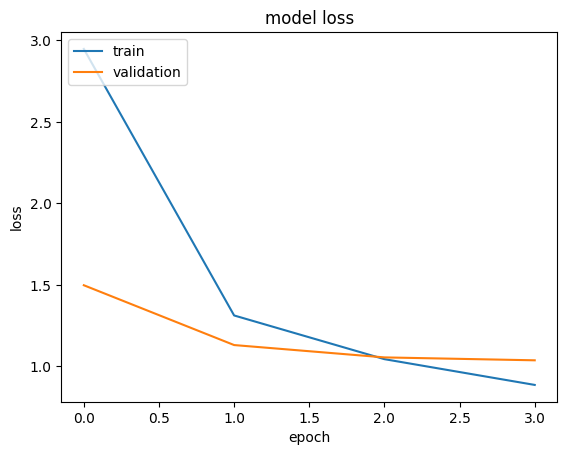

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')
plt.show()

In [ ]:
test_text = ['ไฟแดง เลี้ยว ขวา เข้า ซอย เสีย ทำ ให้ รถ เลี้ยว ฝ่า ไฟ แดง ใน ตอน ทางตรง ไฟ เขียว อันตราย มาก ครับ']
#test_text = ['พื้น แตก เป็น หลุม']
encoded_test = encoding_doc(tokenizer, test_text)
padded_test = padding_doc(encoded_test, max_len)

# Generate predictions for samples
predictions = model.predict(padded_test)
for column_name, prediction in zip(train_data.columns[4:], predictions):
    print(f'{column_name}  -->  {prediction}')

1/1 [==============================] - 0s 23ms/step
PM2.5  -->  [[5.4169213e-06]]
การเดินทาง  -->  [[0.00093443]]
กีดขวาง  -->  [[0.00424608]]
คนจรจัด  -->  [[5.904413e-05]]
คลอง  -->  [[0.0005298]]
ความปลอดภัย  -->  [[0.99242145]]
ความสะอาด  -->  [[0.00042781]]
จราจร  -->  [[0.99179673]]
ต้นไม้  -->  [[7.954759e-05]]
ถนน  -->  [[0.00236408]]
ทางเท้า  -->  [[9.43527e-05]]
ท่อระบายน้ำ  -->  [[0.00030051]]
น้ำท่วม  -->  [[3.992715e-05]]
ป้าย  -->  [[0.00105262]]
ป้ายจราจร  -->  [[4.1747557e-05]]
ร้องเรียน  -->  [[0.00662563]]
สอบถาม  -->  [[6.674452e-05]]
สะพาน  -->  [[0.00176346]]
สัตว์จรจัด  -->  [[0.00016223]]
สายไฟ  -->  [[8.402889e-05]]
ห้องน้ำ  -->  [[5.7672823e-05]]
เสนอแนะ  -->  [[0.00024313]]
เสียงรบกวน  -->  [[0.00013529]]
แสงสว่าง  -->  [[0.07559918]]


In [ ]:
y_pred = model.predict(test_padded)

659/659 [==============================] - 3s 5ms/step


In [ ]:
y_test_df = pd.DataFrame(y_pred[0],columns=['PM2.5'])
y_test_df['การเดินทาง'] = y_pred[1]
y_test_df['กีดขวาง'] = y_pred[2]
y_test_df['คนจรจัด']= y_pred[3]
y_test_df['คลอง'] = y_pred[4]
y_test_df['ความปลอดภัย'] = y_pred[5]
y_test_df['ความสะอาด'] = y_pred[6]
y_test_df['จราจร'] = y_pred[7]
y_test_df['ต้นไม้'] = y_pred[8]
y_test_df['ถนน'] = y_pred[9]
y_test_df['ทางเท้า'] = y_pred[10]
y_test_df['ท่อระบายน้ำ'] = y_pred[11]
y_test_df['น้ำท่วม'] = y_pred[12]
y_test_df['ป้าย'] = y_pred[13]
y_test_df['ป้ายจราจร'] = y_pred[14]
y_test_df['ร้องเรียน'] = y_pred[15]
y_test_df['สอบถาม'] = y_pred[16]
y_test_df['สะพาน'] = y_pred[17]
y_test_df['สัตว์จรจัด'] = y_pred[18]
y_test_df['สายไฟ'] = y_pred[19]
y_test_df['ห้องน้ำ'] = y_pred[20]
y_test_df['เสนอแนะ'] = y_pred[21]
y_test_df['เสียงรบกวน'] = y_pred[22]
y_test_df['แสงสว่าง'] = y_pred[23]

In [ ]:
y_true = test_data[['PM2.5', 'การเดินทาง', 'กีดขวาง', 'คนจรจัด', 'คลอง', 'ความปลอดภัย',
       'ความสะอาด', 'จราจร', 'ต้นไม้', 'ถนน', 'ทางเท้า', 'ท่อระบายน้ำ',
       'น้ำท่วม', 'ป้าย', 'ป้ายจราจร', 'ร้องเรียน', 'สอบถาม', 'สะพาน',
       'สัตว์จรจัด', 'สายไฟ', 'ห้องน้ำ', 'เสนอแนะ', 'เสียงรบกวน', 'แสงสว่าง']]

In [ ]:
import tensorflow_addons as tfa

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
hl_metric = tfa.metrics.HammingLoss(mode='multilabel', threshold=0.5)
hl_metric.update_state(y_true, y_test_df)
hl_metric.result().numpy()

0.014094387

In [ ]:
y_pred_df = y_test_df.applymap(lambda x: 1 if x >= 0.5 else 0)

In [ ]:
cols = ['PM2.5', 'การเดินทาง', 'กีดขวาง', 'คนจรจัด', 'คลอง', 'ความปลอดภัย',
       'ความสะอาด', 'จราจร', 'ต้นไม้', 'ถนน', 'ทางเท้า', 'ท่อระบายน้ำ',
       'น้ำท่วม', 'ป้าย', 'ป้ายจราจร', 'ร้องเรียน', 'สอบถาม', 'สะพาน',
       'สัตว์จรจัด', 'สายไฟ', 'ห้องน้ำ', 'เสนอแนะ', 'เสียงรบกวน', 'แสงสว่าง']

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred_df, target_names=cols))

              precision    recall  f1-score   support

       PM2.5       0.80      0.88      0.84       377
  การเดินทาง       0.65      0.30      0.41       168
     กีดขวาง       0.85      0.84      0.85      1625
     คนจรจัด       0.95      0.75      0.84       326
        คลอง       0.86      0.92      0.89      1285
 ความปลอดภัย       0.94      0.97      0.95      2986
   ความสะอาด       0.89      0.88      0.88      1773
       จราจร       0.97      0.92      0.94      1596
      ต้นไม้       0.98      0.96      0.97      1542
         ถนน       0.95      0.96      0.95      7164
     ทางเท้า       0.93      0.94      0.94      2973
 ท่อระบายน้ำ       0.87      0.80      0.83      1861
     น้ำท่วม       0.94      0.80      0.87      1435
        ป้าย       0.97      0.96      0.97      1730
   ป้ายจราจร       0.99      0.88      0.93        92
   ร้องเรียน       0.74      0.58      0.65      2463
      สอบถาม       0.97      0.89      0.93       421
       สะพาน       0.93    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
